In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("weight-height.csv")
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [3]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


## 1 inch = 2.54 centimeters
## 1 pound = 0.45359237 kilograms


In [4]:
df["Height"] = round(df["Height"] * 2.54, 2)
df["Weight"] = round(df["Weight"] * 0.45359237, 2)

In [5]:
df

,Gender,Height,Weight
0,Male,187.57,109.72
1,Male,174.71,73.62
2,Male,188.24,96.50
3,Male,182.20,99.81
4,Male,177.50,93.60
...,...,...,...
9995,Female,168.08,62.04
9996,Female,170.35,77.50
9997,Female,162.22,58.28
9998,Female,175.35,74.32


In [6]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,168.573573,73.228120
std,9.772756,14.564138
min,137.830000,29.350000
25%,161.300000,61.607500
50%,168.450000,73.125000
75%,175.702500,84.902500
max,200.660000,122.470000


In [7]:
import matplotlib.pyplot as plt

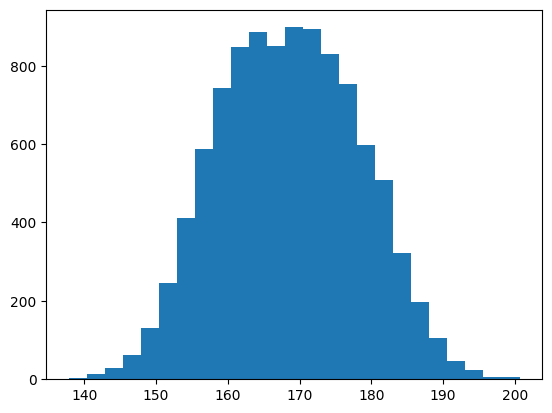

In [8]:
plt.hist(df.Height, bins=25)
plt.show()

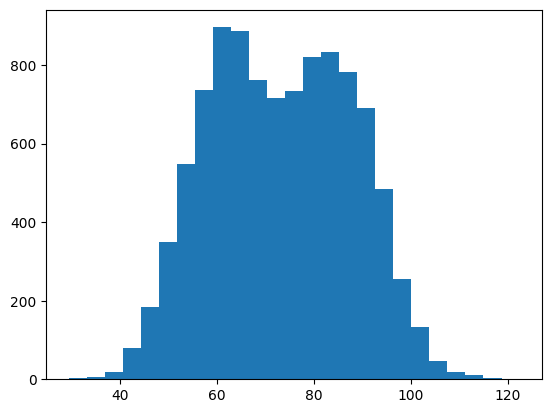

In [9]:
plt.hist(df.Weight, bins=25)
plt.show()

In [10]:
df.Height.mean()

168.573573

In [11]:
df.Height.std()

9.772755626686104

In [39]:
upper_limit_height = df.Height.mean() + 3 * df.Height.std()
upper_limit_height

197.8918398800583

In [40]:
lower_limit_height = df.Height.mean() - 3 * df.Height.std()
lower_limit_height

139.2553061199417

In [41]:
height_mask = (df.Height>upper_limit_height) | (df.Height<lower_limit_height)
df[height_mask]

,Gender,Height,Weight
994,Male,198.36,115.98
1317,Male,199.29,103.12
2014,Male,200.66,122.47
3285,Male,199.46,115.16
3757,Male,199.70,111.46
6624,Female,138.73,32.38
9285,Female,137.83,29.35


In [42]:
df.Weight.mean()

73.22811999999999

In [43]:
df.Weight.std

<bound method NDFrame._add_numeric_operations.<locals>.std of 0       109.72
1        73.62
2        96.50
3        99.81
4        93.60
         ...  
9995     62.04
9996     77.50
9997     58.28
9998     74.32
9999     51.55
Name: Weight, Length: 10000, dtype: float64>

In [44]:
upper_limit_weight = df.Weight.mean() + 3 * df.Weight.std()
upper_limit_weight

116.9205346750945

In [45]:
lower_limit_weight = df.Weight.mean() - 3 * df.Weight.std()
lower_limit_weight

29.53570532490548

In [46]:
weight_mask = (df.Weight>upper_limit_weight) | (df.Weight<lower_limit_weight)
df[weight_mask]

,Gender,Height,Weight
2014,Male,200.66,122.47
9285,Female,137.83,29.35


In [47]:
df[height_mask | weight_mask]

,Gender,Height,Weight
994,Male,198.36,115.98
1317,Male,199.29,103.12
2014,Male,200.66,122.47
3285,Male,199.46,115.16
3757,Male,199.70,111.46
6624,Female,138.73,32.38
9285,Female,137.83,29.35


In [48]:
df2 = df[~height_mask & ~weight_mask]
df2

,Gender,Height,Weight
0,Male,187.57,109.72
1,Male,174.71,73.62
2,Male,188.24,96.50
3,Male,182.20,99.81
4,Male,177.50,93.60
...,...,...,...
9995,Female,168.08,62.04
9996,Female,170.35,77.50
9997,Female,162.22,58.28
9998,Female,175.35,74.32


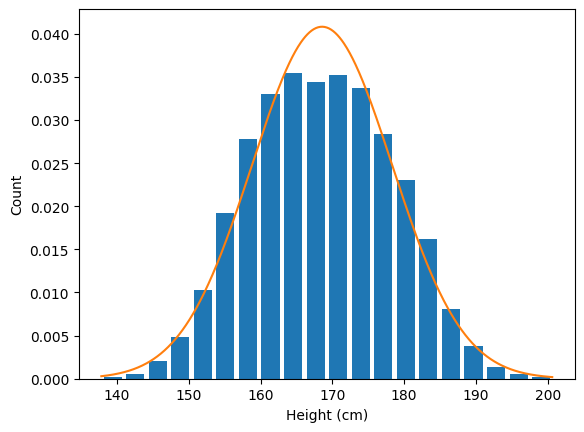

In [50]:
from scipy.stats import norm
import numpy as np
plt.hist(df.Height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (cm)')
plt.ylabel('Count')

rng = np.arange(df.Height.min(), df.Height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.Height.mean(),df.Height.std()))
plt.show()

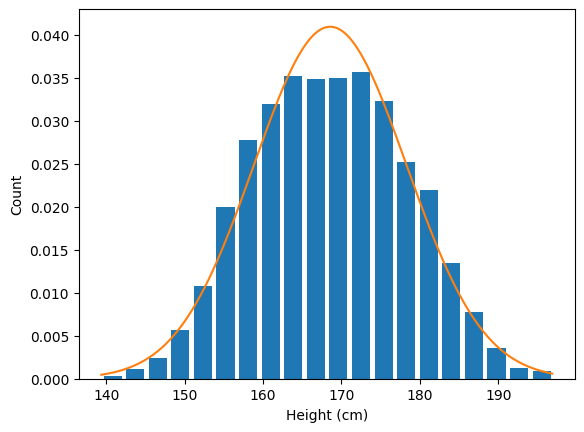

In [51]:
plt.hist(df2.Height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (cm)')
plt.ylabel('Count')

rng = np.arange(df2.Height.min(), df2.Height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df2.Height.mean(),df2.Height.std()))
plt.show()

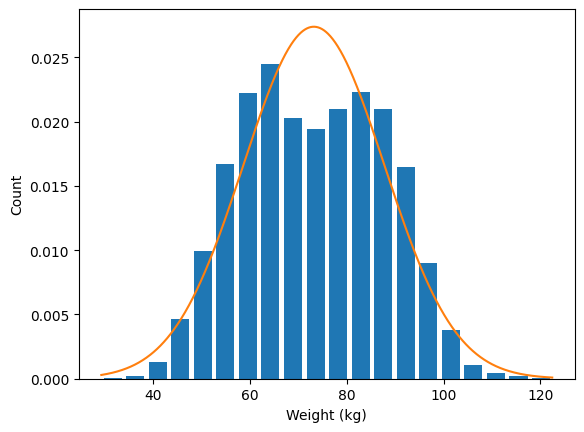

In [52]:
plt.hist(df.Weight, bins=20, rwidth=0.8, density=True)
plt.xlabel('Weight (kg)')
plt.ylabel('Count')

rng = np.arange(df.Weight.min(), df.Weight.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.Weight.mean(),df.Weight.std()))
plt.show()

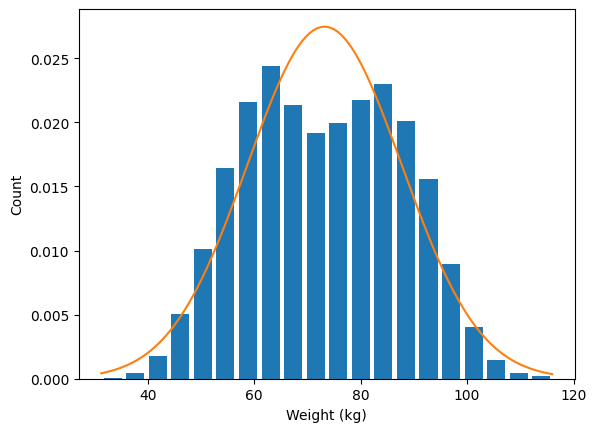

In [53]:
plt.hist(df2.Weight, bins=20, rwidth=0.8, density=True)
plt.xlabel('Weight (kg)')
plt.ylabel('Count')

rng = np.arange(df2.Weight.min(), df2.Weight.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df2.Weight.mean(),df2.Weight.std()))
plt.show()

# Z-Score

##  Z= (x-mü) / alpha
### mü = mean
### alpha = standart deviation


In [54]:
df["Z-Score_height"] = (df.Height - df.Height.mean())/df.Height.std()
df["Z-Score_weight"] = (df.Weight - df.Weight.mean())/df.Weight.std()
df

,Gender,Height,Weight,Z-Score_height,Z-Score_weight
0,Male,187.57,109.72,1.943815,2.505598
1,Male,174.71,73.62,0.627912,0.026907
2,Male,188.24,96.50,2.012373,1.597889
3,Male,182.20,99.81,1.394328,1.825160
4,Male,177.50,93.60,0.913399,1.398770
...,...,...,...,...,...
9995,Female,168.08,62.04,-0.050505,-0.768196
9996,Female,170.35,77.50,0.181773,0.293315
9997,Female,162.22,58.28,-0.650131,-1.026365
9998,Female,175.35,74.32,0.693400,0.074970


In [61]:
z_score_height_mask = (df["Z-Score_height"]>3) | (df["Z-Score_height"]<-3)
df[z_score_height_mask]

,Gender,Height,Weight,Z-Score_height,Z-Score_weight
994,Male,198.36,115.98,3.047905,2.935421
1317,Male,199.29,103.12,3.143067,2.052430
2014,Male,200.66,122.47,3.283253,3.381036
3285,Male,199.46,115.16,3.160462,2.879119
3757,Male,199.70,111.46,3.185020,2.625070
6624,Female,138.73,32.38,-3.053752,-2.804706
9285,Female,137.83,29.35,-3.145845,-3.012751


In [62]:
z_score_weight_mask = (df["Z-Score_weight"]>3) | (df["Z-Score_weight"]<-3)
df[z_score_weight_mask]

,Gender,Height,Weight,Z-Score_height,Z-Score_weight
2014,Male,200.66,122.47,3.283253,3.381036
9285,Female,137.83,29.35,-3.145845,-3.012751


In [65]:
df3 = df[~z_score_height_mask & ~z_score_weight_mask]
df3

,Gender,Height,Weight,Z-Score_height,Z-Score_weight
0,Male,187.57,109.72,1.943815,2.505598
1,Male,174.71,73.62,0.627912,0.026907
2,Male,188.24,96.50,2.012373,1.597889
3,Male,182.20,99.81,1.394328,1.825160
4,Male,177.50,93.60,0.913399,1.398770
...,...,...,...,...,...
9995,Female,168.08,62.04,-0.050505,-0.768196
9996,Female,170.35,77.50,0.181773,0.293315
9997,Female,162.22,58.28,-0.650131,-1.026365
9998,Female,175.35,74.32,0.693400,0.074970
